In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('heart_data.csv')

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
df.shape

(1018, 14)

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: xlabel='target', ylabel='count'>

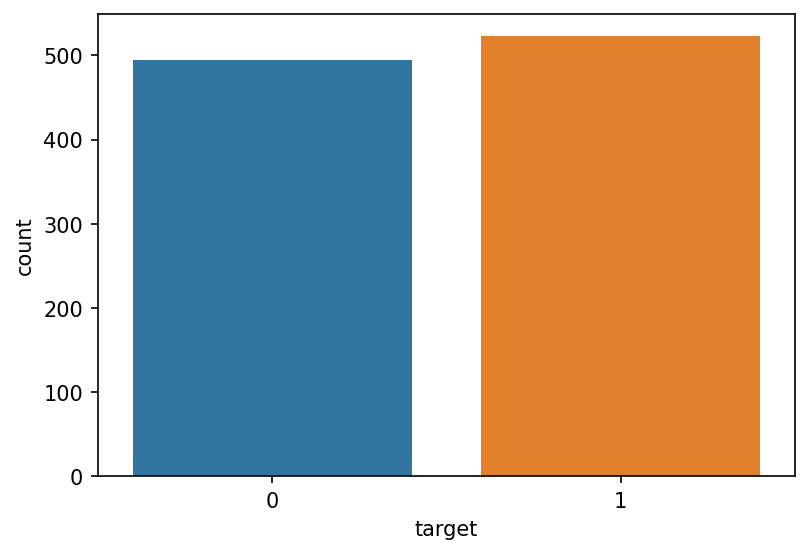

In [11]:
plt.figure(figsize=(6, 4), dpi=150)
sns.countplot(x=df['target'])

<Axes: xlabel='sex', ylabel='count'>

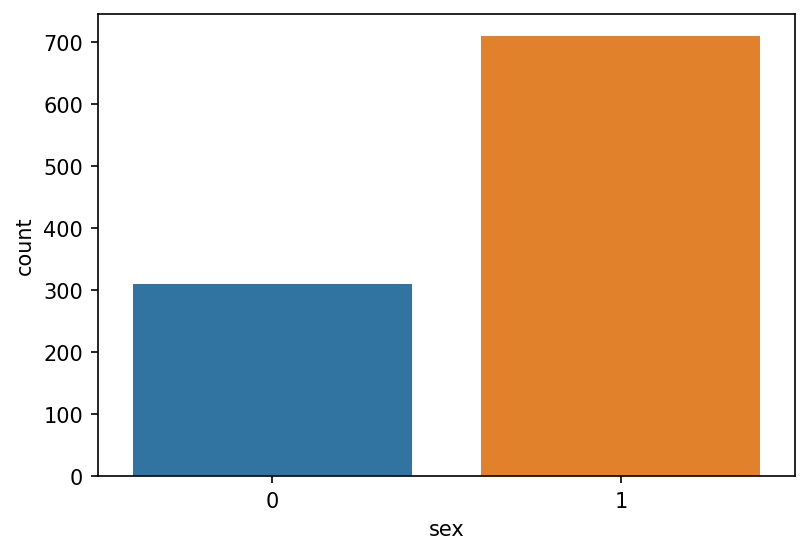

In [12]:
plt.figure(figsize=(6, 4), dpi=150)
sns.countplot(x=df['sex'])

<Axes: >

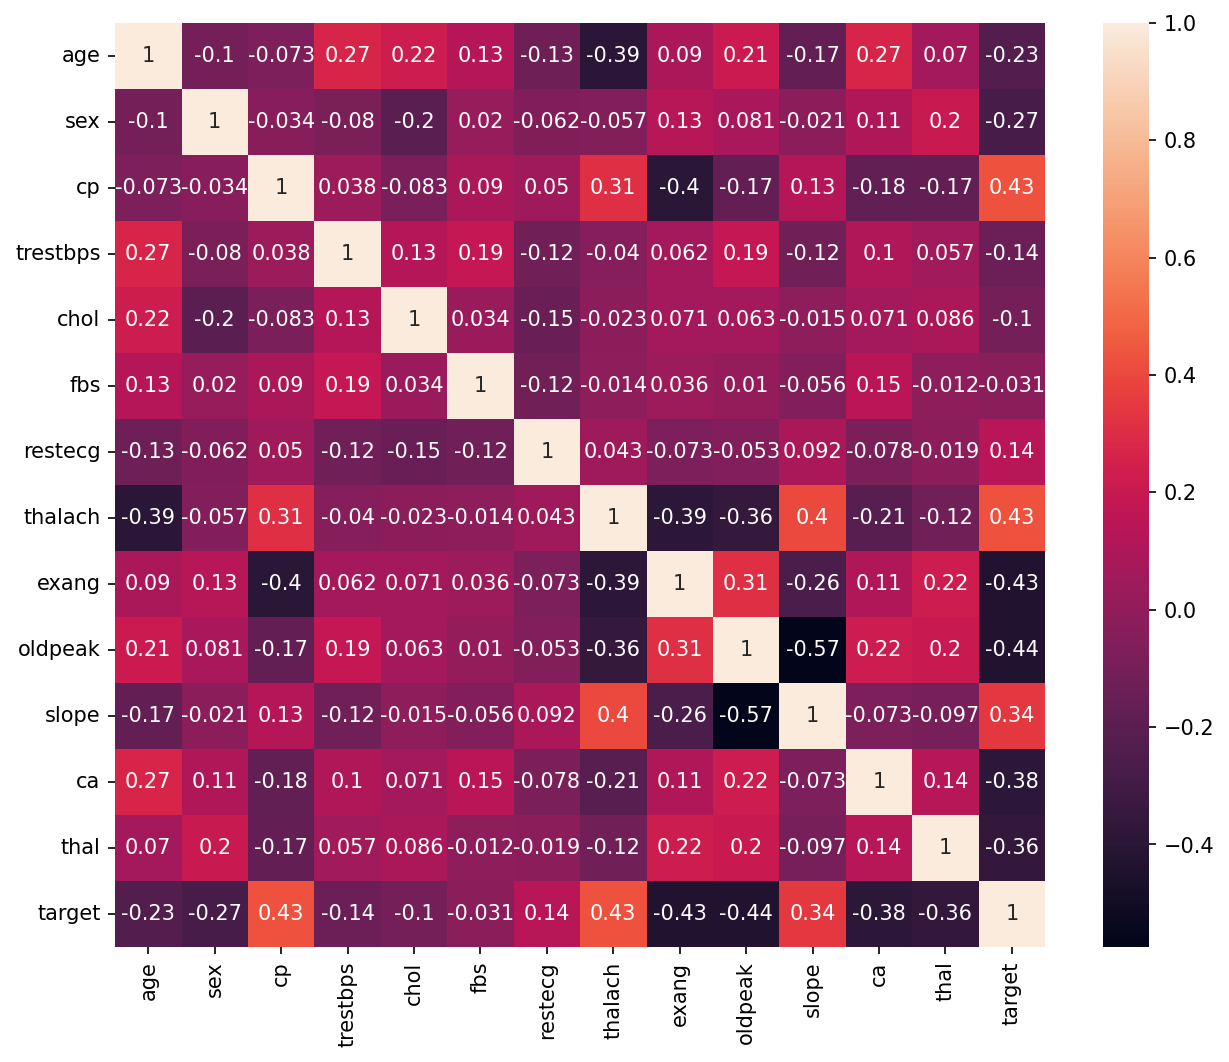

In [13]:
plt.figure(figsize=(10, 8), dpi=150)
sns.heatmap(df.corr(), annot = True)

In [14]:
"""sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect"
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values."""

'sex\nchest pain type (4 values)\nresting blood pressure\nserum cholestoral in mg/dl\nfasting blood sugar > 120 mg/dl\nresting electrocardiographic results (values 0,1,2)\nmaximum heart rate achieved\nexercise induced angina\noldpeak = ST depression induced by exercise relative to rest\nthe slope of the peak exercise ST segment\nnumber of major vessels (0-3) colored by flourosopy\nthal: 0 = normal; 1 = fixed defect; 2 = reversable defect"\nThe names and social security numbers of the patients were recently removed from the database, replaced with dummy values.'

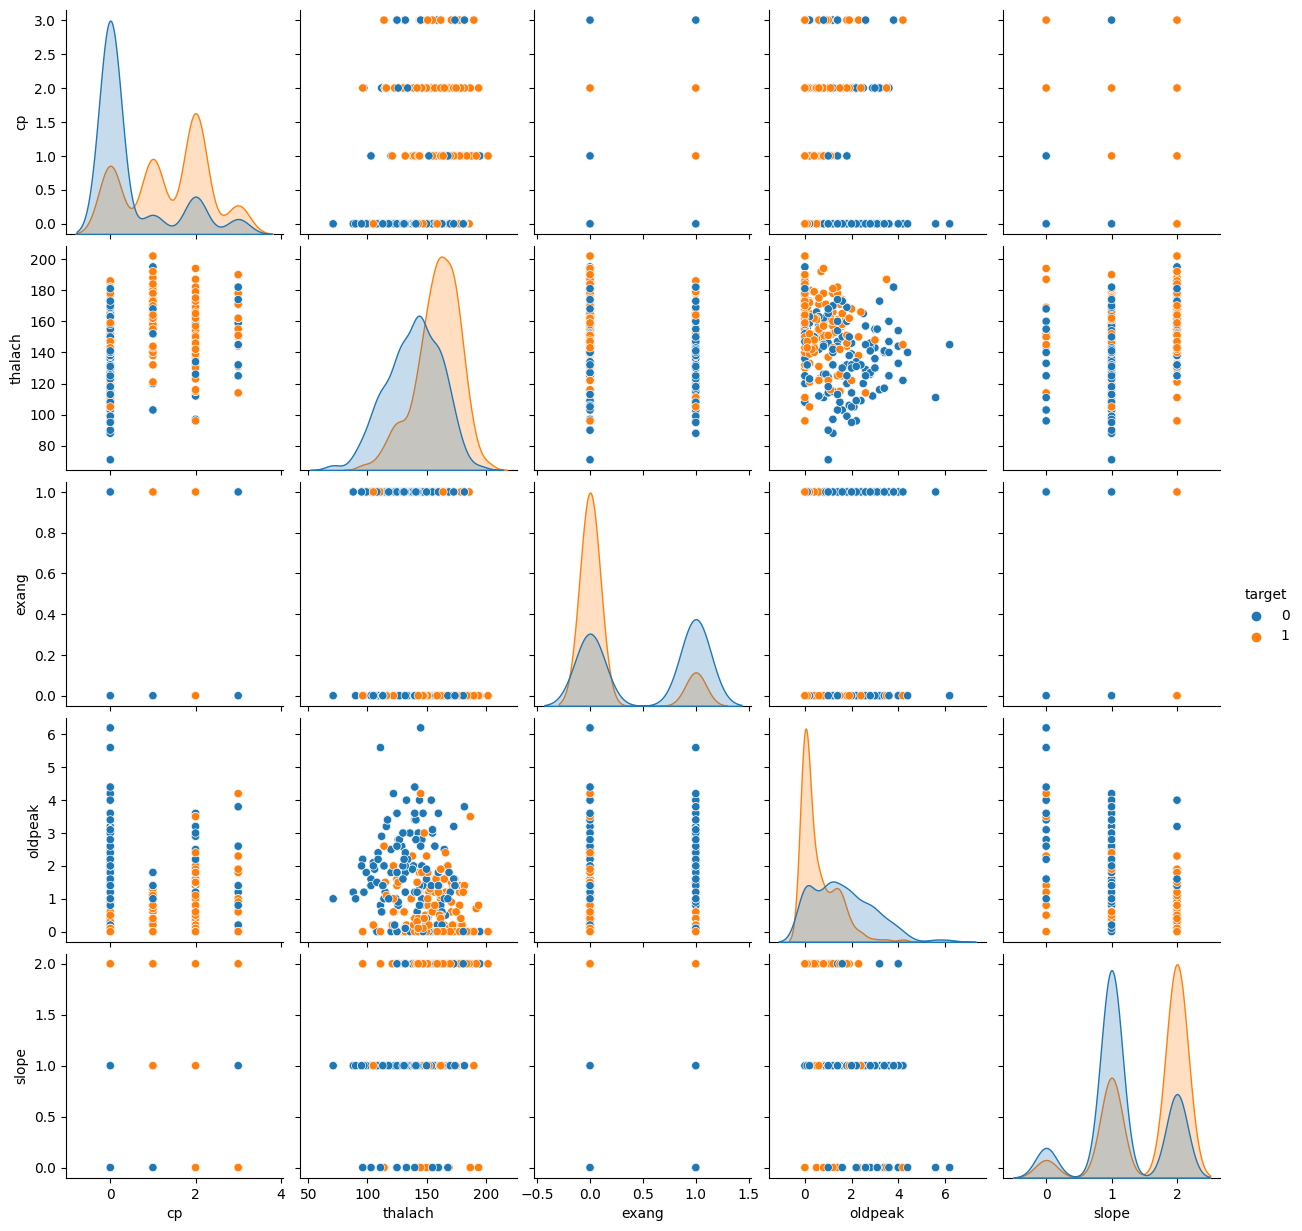

In [15]:
imp_char = ['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'target']

sns.pairplot(df[imp_char], hue="target")

In [16]:
X = df.drop('target', axis=1)
y = df['target']

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, ConfusionMatrixDisplay

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
model = DecisionTreeClassifier()

In [29]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

In [30]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [3, 4, 5]}

In [31]:
grid = GridSearchCV(model, param_grid)

In [32]:
grid.fit(X_train, y_train)

/Users/tanish/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tanish/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tanish/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/tanish/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/Us

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [33]:
grid.best_params_

{'max_depth': 5, 'max_features': 'sqrt'}

In [20]:
model1 = DecisionTreeClassifier(max_depth= 5, max_features= 'sqrt')

In [21]:
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features='sqrt')

In [22]:
y_pred = grid.predict(X_test)

NameError: name 'grid' is not defined

In [40]:
accuracy_score(y_test, y_pred)

0.8571428571428571

In [41]:
con_mat = confusion_matrix(y_test, y_pred)

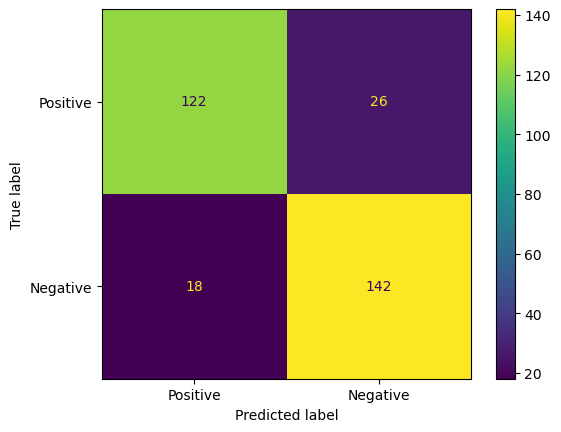

In [42]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = ["Positive", "Negative"])
cm_display.plot()
plt.show()

In [43]:
df_imp_feat = pd.DataFrame(index=X.columns,data=model1.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance')

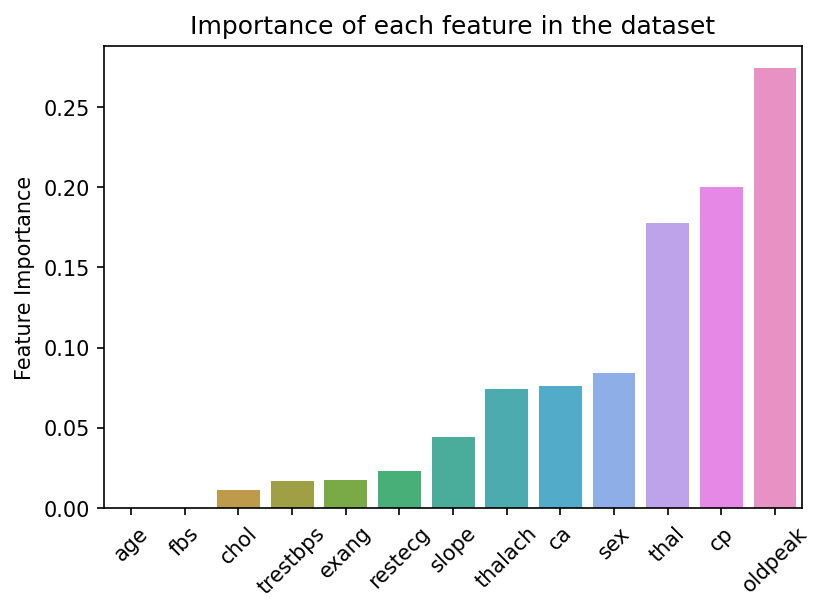

In [44]:
plt.figure(figsize=(6, 4), dpi=150)
sns.barplot(x = df_imp_feat.index, y=df_imp_feat['Feature Importance'])
plt.xticks(rotation=45);
plt.title("Importance of each feature in the dataset");

In [46]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [47]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [49]:
# Loaded model 
m = {}
for i in df.columns[:-1]:
    m[i] = 0

age = int(input("Enter your age: "))
m['age'] = age

cp = int(input("Enter if you have chest pain and the level: (0: No, 1:mild, 2:moderate, 3:severe)  "))
m['cp'] = cp

rest_bp = int(input("Enter resting blood pressure: "))
m['trestbps'] = rest_bp

chol = int(input(" Enter serum cholestoral in mg/dl:  "))
m['chol'] = chol 

max_heart_rate = int(input("Enter maximum heart rate achieved:  "))
m['thalach'] = max_heart_rate

exang = int(input("Enter exercise induced angima:  "))
m['exang'] = exang

oldpeak = float(input("Enter ST depression induced by exercise relative to rest: "))
m['oldpeak'] = oldpeak


ca = int(input("Enter number of major vessels (0-3) colored by flourosopy: "))
m['ca'] = ca

thal = int(input("Enter thal: 0 = normal; 1 = fixed defect; 2 = reversable defect: "))
m['thal'] = thal

predictors = [list(m.values())]
outcome = model1.predict(predictors)[0]
prob = model1.predict_proba(predictors)[0]

if outcome == 0:
    print("You don't have Heart-Disease: ")
    print(f"Probablity of the outcome is {round(prob[0]*100, 2)}%. ")
else:
    print("You have Heart-Disease: ")
    print(f"Probablity of the outcome is {round(prob[1]*100, 2)}%. ")
    
if outcome == 1 and prob[1] > 0.80:
    print(f"Consult Doctor Immediately. ")



Enter your age: 37
Enter if you have chest pain and the level: (0: No, 1:mild, 2:moderate, 3:severe)  1
Enter resting blood pressure: 248
 Enter serum cholestoral in mg/dl:  122
Enter maximum heart rate achieved:  0
Enter exercise induced angima:  1
Enter ST depression induced by exercise relative to rest: 0
Enter number of major vessels (0-3) colored by flourosopy: 2
Enter thal: 0 = normal; 1 = fixed defect; 2 = reversable defect: 2
You have Heart-Disease: 
Probablity of the outcome is 85.0%. 
Consult Doctor Immediately. 


/Users/tanish/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/tanish/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [50]:
from joblib import dump, load

In [52]:
dump(model1, "Heart-Disease.joblib")

['Heart-Disease.joblib']

In [53]:
import joblib

print("Joblib version:", joblib.__version__)


Joblib version: 1.2.0
